<a href="https://colab.research.google.com/github/Sylver640/ADA-Informes/blob/main/Informe_QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema (ordenamiento)
**Entrada**: Secuencia de n números $[a_1,a_2,a_3,...,a_n]$.

**Salida**: Permutación ordenada de la secuencia inicial: $[a_1',a_2',a_3',...,a_n']$, pero con los valores ordenados tal que $a_1'<=a_2'<=a_3'<=...<=a_n'$.

Hace algunos informes atrás, veíamos diferentes algoritmos cuya tarea era simple: ordenar una serie de elementos. Un problema que desde los inicios de la informática ha generado que se creen cientos de estos programas, algunos más rápidos que otros haciendo esta acción, aunque trabajando de diferente forma. Algoritmos como el **Insertion Sort** funcionan de manera iterativa, pero con el costo de ser este último algo más lento, mientras que el **Merge Sort** es más rápido, pero es una función que actúa de manera recursiva, es decir se llama a sí misma. Aquellos algoritmos de este último tipo se guían por el paradigma de "divide y vencerás", el cual resulta muy útil para resolver este problema debido a que su naturaleza de subproblemas se traduce en el ordenamiento de arreglos más pequeños, que facilitan el reordenamiento de la lista principal. Y en 1959, el informático **Tony Hoare** no pudo haber implementado mejor esta técnica, puesto que es el responsable de crear el conocido **Quick Sort**, que, por redundante que suene por su nombre en inglés, es, hasta ahora, uno de los algoritmos más rápidos para ordenar una lista de elementos.

![image](https://upload.wikimedia.org/wikipedia/commons/f/fe/Quicksort.gif)

#2. Quick Sort

Este algoritmo fue desarrollado por Tony Hoare en el año 1959. Se guía por el paradigma de "divide y vencerás", y es una función recursiva.

##2.1 Código
A continuación, el siguiente código presenta una implementación del algoritmo.

In [1]:
import random

comparisons = 0

#Función que busca la mediana entre tres números
def median_of_three(a,b,c,verbose):
  if verbose == True:
    print(f"Elementos aleatorios recibidos: {a}, {b}, {c}")
  if a <= b and b <= c:
        return b
  if c <= b and b <= a:
        return b
  if a <= c and c <= b:
        return c
  if b <= c and c <= a:
        return c
  return a

#Implementación de partition que usa como pivote el último elemento
def partition_end(A, p, r, verbose):
  if verbose == True:
    print("\n####")
    print("Se entra a función partition!")
  global comparisons
  if verbose == True:
    print(f"Arreglo a dividir: {A[p:r+1]}")
  pivot = A[r] #Pivote es el último elemento
  if verbose == True:
    print(f"Pivote: [{A[r]}]")
  i = p #El puntero de intercambio comenzará desde el inicio del arreglo
  for j in range(p,r): #Mientras que el puntero j recorrerá todo el intervalo
    if A[j] <= pivot: #Si A[j] es menor o igual al pivote se entra a esta condicional if que realiza el intercambio
      if verbose == True:
        print(f"{A[j]} es menor a {pivot}! Swap!")
      A[j], A[i] = A[i], A[j] #Se intercambian las posiciones de A[j] y A[i] 
      i+=1 #Nuestro índice izquierdo aumenta una unidad, cerrando más el intervalo
      if verbose == True:
        print(f"Arreglo luego del intercambio: {A[p:r+1]}")
      comparisons+=1

  A[i], A[r] = A[r], A[i] #Finalmente, intercambiamos nuestro pivote con la posición A[i], dejándonos así un arreglo donde la mitad izquierda es menor
                          #y la mitad derecha es mayor al pivote
  if verbose == True:
    print(f"Arreglo tras partition: {A[p:r+1]}")
    print("###\n")
  return i #Retornamos como pivote la posición i de nuestro arreglo

#Implementación de partition que usa como pivote el primer elemento
def partition_start(A, p, r, verbose):
  if verbose == True:
    print("\n####")
    print("Se entra a función partition!")
  global comparisons
  if verbose == True:
    print(f"Arreglo a dividir: {A[p:r+1]}")
  pivot = A[p] #Pivote es el primer elemento
  if verbose == True:
    print(f"Pivote: [{A[p]}]")
  i = p+1 #El índice que define a la izquierda es el que le sigue al primer elemento
  for j in range(p+1,r+1): #Mientras tanto, el índice j ira desde la misma posición de i hasta el último elemento
    if A[j] <= pivot: #Si A[j] es menor o igual al pivote se entra a esta condicional if que realiza el intercambio
      if verbose == True:
        print(f"{A[j]} es menor a {pivot}! Swap!")
      comparisons+=1
      A[i], A[j] = A[j], A[i] #Se intercambian las posiciones de A[j] y A[i]
      i+=1 #El índice izquierdo avanza una posición
      if verbose == True:
        print(f"Arreglo luego del intercambio: {A[p:r+1]}")
  A[p], A[i-1] = A[i-1], A[p] #Finalmente, intercambiamos nuestro pivote con aquel valor que está justo antes del índice izquierdo

  if verbose == True:
    print(f"Arreglo tras partition: {A[p:r+1]}")
    print("###\n")
  return i-1 #Retornamos como pivote este valor recién mencionado

#Implementación de partition que usa como pivote la mediana entre tres números al azar del arreglo
def partition_median(A, p, r, verbose):
  if verbose == True:
    print("\n####")
    print("Se entra a función partition!")
  global comparisons
  if verbose == True:
    print(f"Arreglo a dividir: {A[p:r+1]}")
  pivot = median_of_three(random.choice(array[p:r]),random.choice(array[p:r]),random.choice(array[p:r]),verbose) #Pivote es la mediana entre tres elementos aleatorios
  pivot_position = A.index(pivot) #Se busca el índice del valor escogido en el arreglo
  if verbose == True:
    print(f"La mediana (pivote) es: [{pivot}]")

  A[pivot_position], A[p]= A[p], pivot #Por último, y con tal de trabajar de una forma más óptima, nuestro pivote se traslada al inicio del arreglo,
                                       #por lo que el procedimiento sería el mismo explicado anteriormente

  i = p+1
  for j in range(p+1,r+1):
    if A[j] <= pivot:
      if verbose == True:
        print(f"{A[j]} es menor a {pivot}! Swap!")
      comparisons+=1
      A[j], A[i] = A[i], A[j]
      i+=1
      if verbose == True:
        print(f"Arreglo luego del intercambio: {A[p:r+1]}")
  A[p], A[i-1] = A[i-1], A[p]

  if verbose == True:
    print(f"Arreglo tras partition: {A[p:r+1]}")
    print("###\n")
  return i-1

def quick_sort(A, start, end, opt, verbose):
  if (start == end): #Si el arreglo es de solo un elemento, se retorna de inmediato
    if verbose == True:
      print(f"Se retorna arreglo de solo un elemento ([{A[start]}])\n")
    return A
  if (start < end): #Hacemos quicksort solo si el arreglo tiene más de dos elementos
    #Con tal de probar las tres funciones "partition" implementadas, la variable "opt" definirá cuál será la implementación a utilizar para el arreglo
    if (opt == 1):
      pivot = partition_end(A, start, end, verbose)
    elif (opt == 2):
      pivot = partition_start(A, start, end, verbose)
    else:
        pivot = partition_median(A, start, end, verbose)

    #Luego de dividir y ordenar el arreglo con cualquiera de las implementaciones de "partition", se llama recursivamente 
    #la función para ordenar la primera y segunda mitad del arreglo
    if verbose == True:
      if (len(A[start:pivot-1]) > 0):
        print(f"\nLlamada recursiva con arreglo izquierdo: {A[start:pivot]}")
        quick_sort(A, start, pivot-1, opt, verbose)
    else:
      quick_sort(A, start, pivot-1, opt, verbose)
    if verbose == True and len(A[start:pivot-1]) >= 2:
        print(f"\nLlamada recursiva con arreglo derecho: {A[pivot+1:end+1]}")
        quick_sort(A, pivot+1, end, opt, verbose)
    else:
      quick_sort(A, pivot+1, end, opt, verbose)
  
  if verbose == True:
    print(f"Subarreglo ordenado: {A[start:end+1]}")
  return A

#Ejemplo
opt = random.randint(1,3) #Define qué implementación de "partition" será utilizada
n = random.randint(2,6) #Se define la cantidad de elementos que tendrá nuestro arreglo de forma aleatoria
array = random.sample(range(1,100),n) #Se crea un arreglo aleatorio
print(f"Input: {array}")
array = quick_sort(array, 0, len(array)-1, opt, verbose = False)
print(f"Sorted array: {array}")
if opt == 1:
  print("Partition implementation used: Last element")
if opt == 2:
  print("Partition implementation used: First element")
if opt == 3:
  print("Partition implementation used: Median of three random numbers")
print(f"Number of comparisons: {comparisons}")

Input: [80, 30, 42, 25, 95]
Sorted array: [25, 30, 42, 80, 95]
Partition implementation used: Median of three random numbers
Number of comparisons: 1


##2.2 Descripción del algoritmo
El algoritmo es del tipo **divide y vencerás**, y es recursivo, llamándose dos veces dentro de sí mismo. Como entrada, recibe una secuencia de $n$ números y retorna esta ordenada de menor a mayor. Explicada de forma general, la función principal funciona de la siguiente manera:

1. Se llama a la función partition, la cual selecciona un pivote con el cual dividiremos el algoritmo.
2. Ya con nuestro pivote, la función se llama recursivamente en dos ocasiones: para ordenar el **subarreglo izquierdo al pivote** y aquel **subarreglo derecho al pivote**.
3. Finalmente, **Quick Sort** nos retorna el arreglo original ya ordenado. Cabe resaltar que si éste es de solo un elemento, se retorna inmediatamente sin hacer lo anterior.

![image](https://miro.medium.com/max/672/0*UhtvKDTP7-srp75V)

Por otra parte, dentro del programa se ejecuta la función **partition**, la cual realiza un constante reordenamiento del arreglo original, subdividiendo a éste en dos con respecto a un elemento central $q$: un subarreglo menor a la izquierda y un subarreglo mayor a la derecha. En este caso esta parte del programa fue implementada de tres formas diferentes. Cada una funciona de la siguiente manera:

a) Último elemento como pivote:
1. Seleccionamos como pivote, tal como dice su nombre, el último elemento de un arreglo ($A[r]$).
2. Con ayuda de dos índices $i$ y $j$ recorremos el arreglo hasta $r-1$.
3. En cada iteración, verificamos si $A[j]$ es menor o igual al pivote. Si esto sucede, intercambiamos $A[j]$ con $A[i]$, y avanzamos con $i$.
4. Al terminar el bucle, intercambiamos $A[r]$ con $A[i]$, y retornamos $i$.

b) Primer elemento como pivote:
1. En este caso, nuestro pivote será el primer elemento de un arreglo ($A[p]$)-
2. Con ayuda de dos índices $i$ y $j$ recorremos el arreglo desde $p+1$ hasta $r$.
3. En cada iteración, verificamos si $A[j]$ es menor o igual al pivote. Si esto sucede, intercambiamos $A[j]$ con $A[i]$, y avanzamos con $i$.
4. Al terminar el bucle, intercambiamos $A[p]$ con $A[i-1]$, y retornamos $i-1$.

c) La mediana de tres elementos al azar del arreglo como pivote:
1. Ahora nuestro pivote será la mediana de tres elementos, los cuales escogeremos de forma aleatoria.
2. Con ayuda de otra función, calculamos cuál es la mediana de estos elementos. Al obtener esta información, vemos en qué índice se encuentra este número en el arreglo $A$.
3. Para facilitar el proceso, luego simplemente intercambiamos este número con el primer elemento del arreglo ($A[p]$), por lo que luego realizamos el mismo proceso descrito en la anterior implementación.

##2.3 Ejemplo
Como muestra, tomaremos el siguiente arreglo:

$A = [10,40,7,9,15,27]$

En este ejemplo utilizaremos la implementación de **partition** que considera al primer elemento como pivote. Por lo que comenzaremos con $A[0]$. Nuestro índice $i$ comenzaría en $A[1]$, donde con $j$ llegaríamos hasta $A[5]$.
Por lo que hasta el momento tendríamos algo así:

$A = [10,40(i)(j),7,9,15,27]$

Como $40$ es mayor a $10$, no pasa nada, por lo que avanzamos con $j$.

$A = [10,40(i),7(j),9,15,27]$

En este caso, efectivamente $7$ es menor a $10$, así que intercambiamos $A[i]$ con $A[j]$, y avanzamos tanto con $i$ como con $j$.

$A = [10,7,40(i),9(j),15,27]$

Siguiente número. $9$ es menor a $10$, así que realizamos el mismo procedimiento.

$A = [10,7,9,40(i),15(j),27]$

Luego $15$ es mayor a $10$, por lo que no intercambiamos y solo avanzamos con $j$.

$A = [10,7,9,40(i),15,27(j)]$

Finalmente, $27$ también es menor a $40$, así que no intercambiamos y finaliza el bucle.

$A = [10,7,9,40(i),15,27(j)]$

Al terminar la función **partition** en esta pasada, intercambiamos $A[0]$ con $A[i-1]$.

$A = [9,7,10,40,15,27]$

De este modo nos quedaría un arreglo dividido en otros dos subarreglos, a la izquierda de $A[2]$ y a su derecha. Por lo tanto la función se llamaría recursivamente para ordenar estos dos correctamente por separado con ayuda de la misma función **partition**.

Empezaremos por la izquierda, es decir $L = [9,7]$. Al empezar la partición, elegimos ahora el $9$ como pivote.

$L = [9,7(i)(j)]$

Al ser tan solo un elemento el que recorremos, el bucle termina de inmediato, por lo que solo bastaría con intercambiar $7$ con $A[i-1]$, que justamente sería también nuestro pivote.

$L = [7,9]$

Ahora seguimos con la derecha, el subarreglo $R = [40,15,27]$. En este caso, el número $40$ será nuestro pivote.

$R = [40,15(i)(j),27]$

$15$ es menor a $40$, pero como $i = j$, solo habría que mover ambos índices.

$R = [40,15,27(i)(j)]$

Nuevamente, $27$ es menor a $40$, pero como ambos índices están en el mismo lugar, los dos avanzan, aunque al llegar $j$ a su límite, el ciclo finaliza. No así $i$, el cual sería igual a $3$, un valor más allá del arreglo, por lo que en el intercambio final se cambiarían de lugar los valores $A[2]$ y $A[0]$.

$R = [27,15,40]$

Por último, nuevamente se llama recursivamente a la función **quicksort** para tanto el subarreglo izquierdo de $R$ como el derecho, aunque éste último está vacío. Al aplicarlo al otro sin embargo resultaría en devolvernos aquel subarreglo ordenado, dejándonos $R$ de la siguiente forma.

$R = [15,27,40]$

¡Y listo! Ya se ordenaron ambos subarreglos laterales del arreglo original, en consecuencia dejándonos este último de menor a mayor, finalizando aquí el algoritmo.

$A = [7,9,10,15,27,40]$

##2.4 Ejecución del algoritmo paso a paso (`verbose = True`)
Al determinar que `verbose` sea igual a `True` en todas las funciones, al ejecutar el programa mostrarán cómo se realiza todo paso a paso, tal como se ve a continuación:

In [ ]:
import random
from termcolor import cprint

opt = random.randint(1,3)
array = random.sample(range(1,100),6)
cprint(f"Arreglo de entrada: {array}", 'yellow', attrs=['bold'])
if opt == 1:
  cprint("Pivote: último elemento", attrs=['bold'])
if opt == 2:
  cprint("Pivote: primer elemento", attrs=['bold'])
if opt == 3:
  cprint("Pivote: mediana de tres elementos al azar del arreglo", attrs=['bold'])
array = quick_sort(array, 0, len(array)-1, opt, verbose = True)
cprint(f"\nArreglo ordenado: {array}", 'yellow', attrs=['bold'])

Arreglo de entrada: [12, 84, 13, 41, 11, 28]
Pivote: mediana de tres elementos al azar del arreglo

####
Se entra a función partition!
Arreglo a dividir: [12, 84, 13, 41, 11, 28]
Elementos aleatorios recibidos: 12, 11, 13
La mediana (pivote) es: [12]
11 es menor a 12! Swap!
Arreglo luego del intercambio: [12, 11, 13, 41, 84, 28]
Arreglo tras partition: [11, 12, 13, 41, 84, 28]
###


####
Se entra a función partition!
Arreglo a dividir: [13, 41, 84, 28]
Elementos aleatorios recibidos: 84, 84, 41
La mediana (pivote) es: [84]
41 es menor a 84! Swap!
Arreglo luego del intercambio: [84, 41, 13, 28]
13 es menor a 84! Swap!
Arreglo luego del intercambio: [84, 41, 13, 28]
28 es menor a 84! Swap!
Arreglo luego del intercambio: [84, 41, 13, 28]
Arreglo tras partition: [28, 41, 13, 84]
###


Llamada recursiva con arreglo izquierdo: [28, 41, 13]

####
Se entra a función partition!
Arreglo a dividir: [28, 41, 13]
Elementos aleatorios recibidos: 28, 28, 41
La mediana (pivote) es: [28]
13 es menor a 

#3. Correctitud

##**3.1 Teorema 1 (Correctitud de la función Partition)**
*El algoritmo **Partition** recibe un arreglo $A[p,...,r]$, lo reorganiza y retorna un índice $q$ de tal forma que los elementos del arreglo $A[p,...,q-1]$ son menores o iguales a $A[q]$ y los elementos del arreglo $A[q+1,...,r]$ son mayores a $A[q]$*

###Prueba del teorema (función Partition)

###Inicialización

###Correctitud

##**3.2 Teorema 2 (correctitud de la función Quick Sort)**
*El algoritmo **Quick Sort** genera un arreglo: $[a'_1,a'_2,a'_3,...,a'_n]$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir, $a'_1 \leq a'_2 \leq a'_3 \leq ... \leq a'_n$.*

###Prueba del teorema (función Quick Sort)

#4. Tiempo de ejecución

##4.1 Teorema (tiempo de ejecución de Quick Sort)

##4.2 Prueba del teorema

#5. Experimentos

##5.1 Número de comparaciones entre el mejor y peor caso teórico de QuickSort 

###Análisis de resultados

##5.2 Comparación entre QuickSort y MergeSort

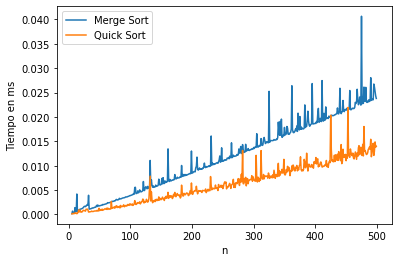

In [ ]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

def merge(array, left, right, verbose = False):
  aux = []
  leftPos = 0
  rightPos = 0

  while(leftPos < len(left) and rightPos < len(right)):
    if (left[leftPos] < right[rightPos]):
      aux.append(left[leftPos])
      leftPos+=1
    else:
      aux.append(right[rightPos])
      rightPos+=1
  
  while (leftPos < len(left)):
    aux.append(left[leftPos])
    leftPos+=1

  while (rightPos < len(right)):
    aux.append(right[rightPos])
    rightPos+=1
  
  for i in range(len(aux)):
    array[i] = aux[i]

def merge_sort(array, verbose = False):
  if  array[0] == array[-1]: return

  mid = len(array) // 2
  leftArray = array[:mid]
  rightArray = array[mid:]
  
  merge_sort(leftArray)
  
  merge_sort(rightArray)
  merge(array, leftArray, rightArray)

x1 = []; y1 = []; x2 = []; y2 = []
verbose = False
for n in range(5,500):
  a = random.sample(range(1,1000),n)

  r = repeat(setup="from __main__ import merge_sort", stmt = f"merge_sort({a})", repeat = 1, number = 10)
  t = repeat(setup="from __main__ import quick_sort", stmt = f"quick_sort({a},{0},{len(a)-1},{1},{verbose})", repeat = 1, number = 10)

  x1.append(n)
  x2.append(n)
  y1.append(r)
  y2.append(t)

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.legend(["Merge Sort","Quick Sort"])

plt.xlabel("n")
plt.ylabel("Tiempo en ms")
plt.show()

###Análisis de resultados

##5.3 Comparación entre los tiempos de ejecución con cada implementación de la función partition

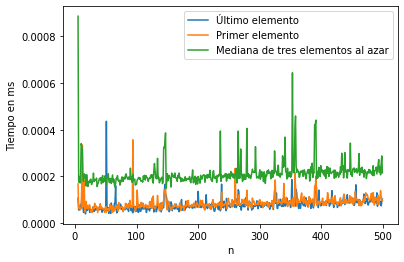

In [ ]:
import random
x1 = []; y1 = []; y2 = []; y3 = []
verbose = False

for n in range(5,500):
  array = random.sample(range(1,1000),n)

  r = repeat(setup="from __main__ import quick_sort", stmt = f"quick_sort({array},{0},{len(a)-1},{1},{verbose})", repeat = 1, number = 10)
  y1.append(r)
  t = repeat(setup="from __main__ import quick_sort", stmt = f"quick_sort({array},{0},{len(a)-1},{2},{verbose})", repeat = 1, number = 10)
  y2.append(t)
  q = repeat(setup="from __main__ import quick_sort", stmt = f"quick_sort({array},{0},{len(a)-1},{3},{verbose})", repeat = 1, number = 10)
  y3.append(q)

  x1.append(n)

plt.plot(x1,y1)
plt.plot(x1,y2)
plt.plot(x1,y3)
plt.legend(["Último elemento","Primer elemento","Mediana de tres elementos al azar"])

plt.xlabel("n")
plt.ylabel("Tiempo en ms")
plt.show()

###Análisis de resultados